In [2]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

Anotaciones:
Desde el lado de Estadistica querriamos ver que tan bueno se aproxima a una gaussiana. Desde ML que tan bien generaliza

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

In [4]:
data = pd.read_csv('data/alturas-pesos-mils-train.csv')[:200]

In [5]:
test = pd.read_csv('data/alturas-pesos-mils-test.csv')

In [6]:
from BiVariateJoint import BiVariateJoint

In [7]:
data_hombres = data.loc[data['Genero']=='Hombre'][['Peso','Altura']].values
data_mujeres = data.loc[data['Genero']=='Mujer'][['Peso','Altura']].values

# Grafico los datos

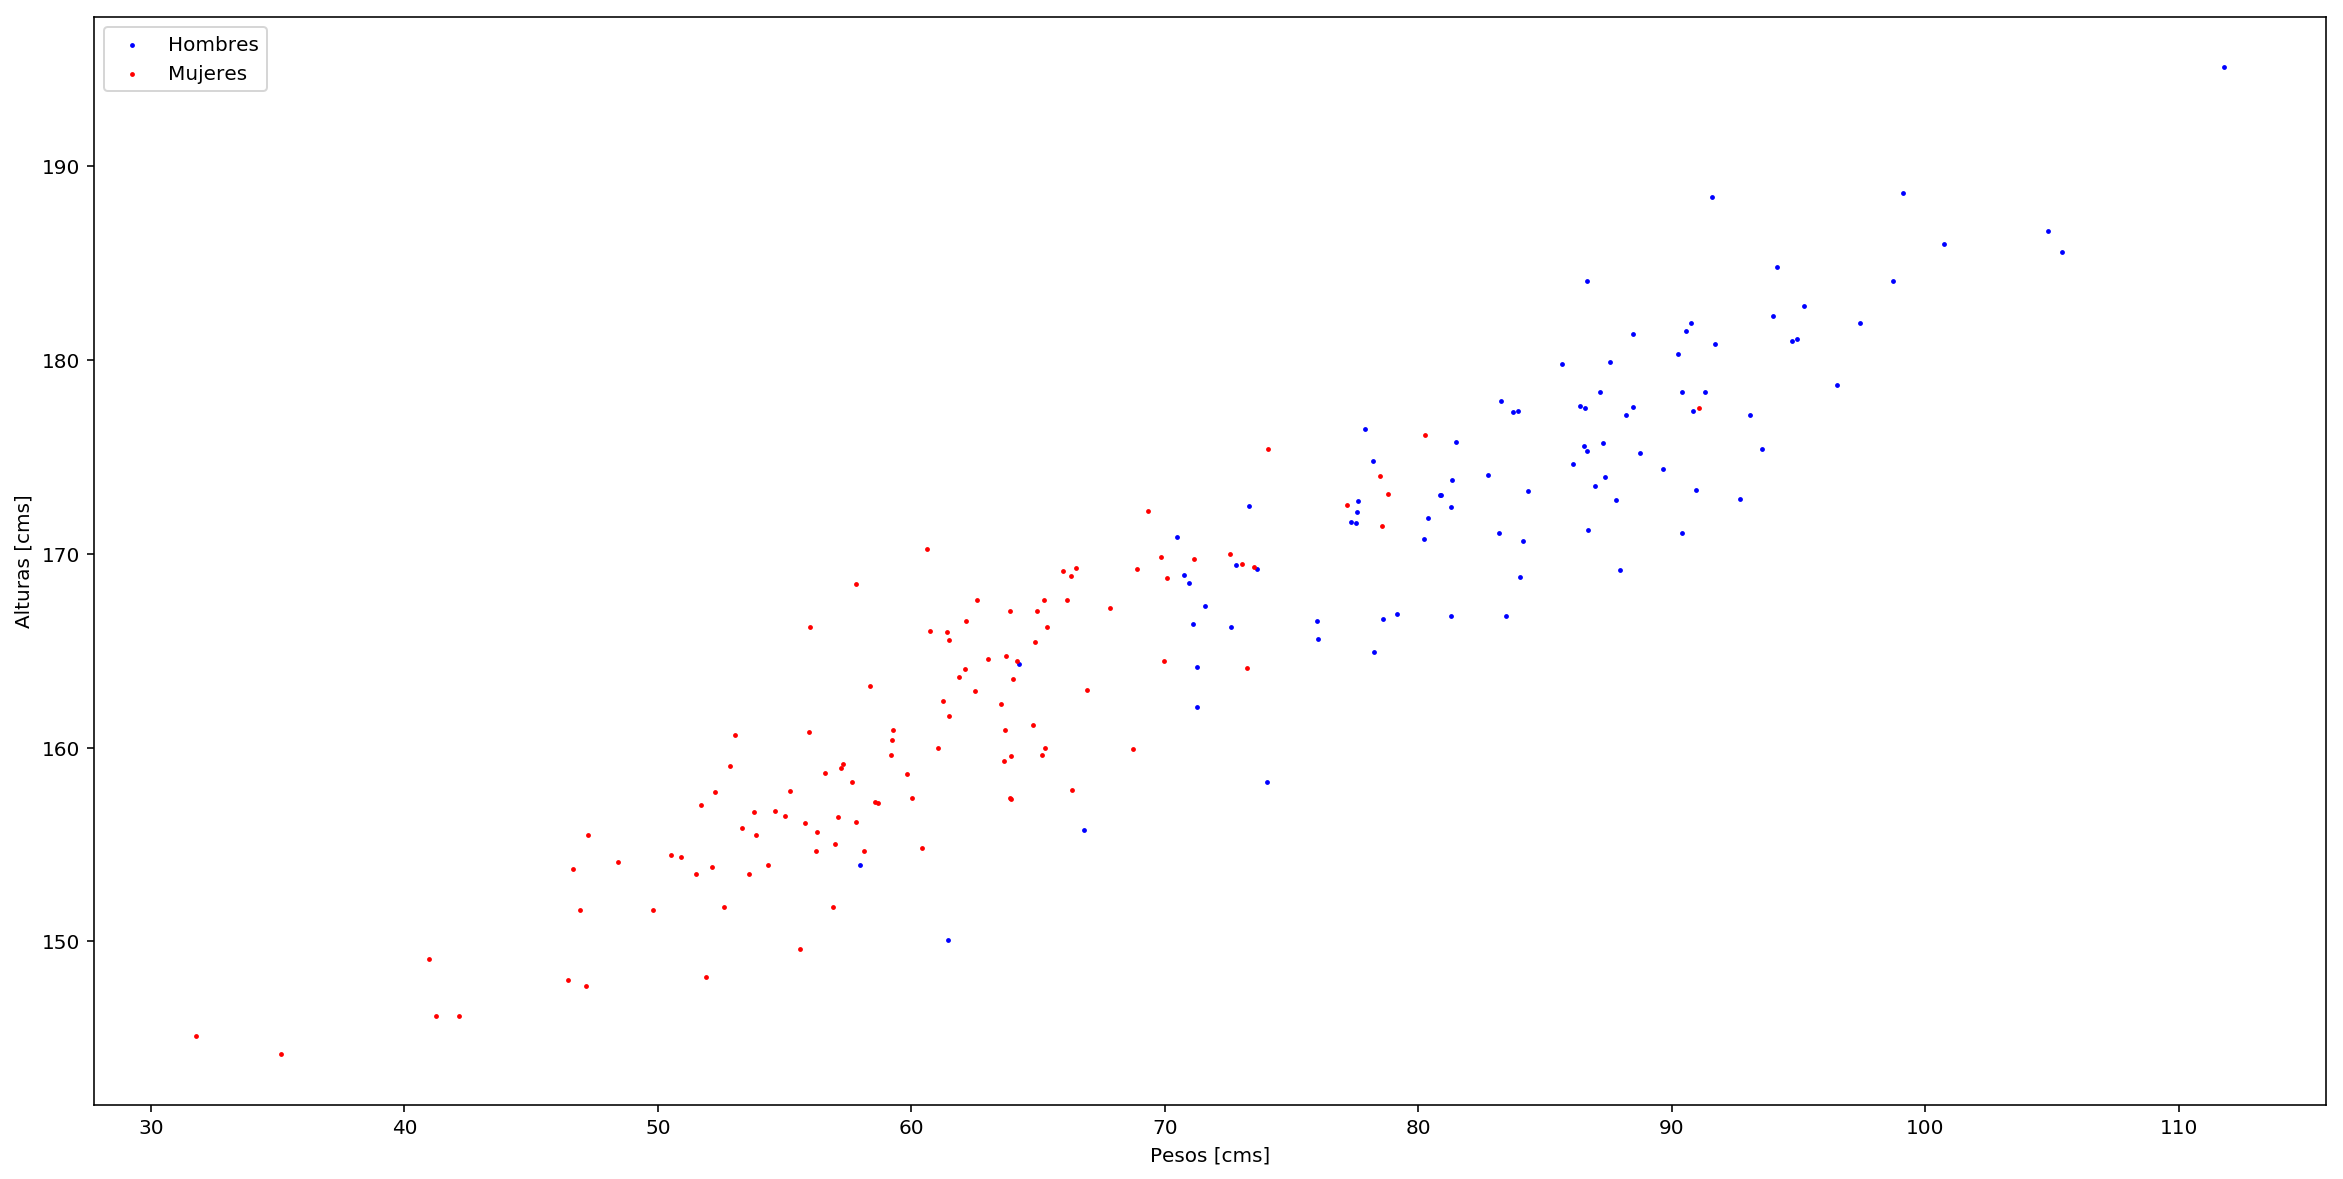

In [8]:
%matplotlib inline
f = plt.figure(figsize=(20,10))
plt.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=2, label='Hombres')
plt.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, label='Mujeres')
plt.xlabel('Pesos [cms]')
plt.ylabel('Alturas [cms]')
plt.legend()
plt.show()

# Regla de Bayes (Continuo)
\begin{equation}
P(Hombre | X_1, X_2) = \frac{p(X_1,X_2 | Hombre) P(Hombre)}{p(X_1,X_2)} \\ \\
\end{equation}

\begin{equation}
P(Mujer | X_1, X_2) = \frac{p(X_1,X_2 | Mujer) P(Mujer)}{p(X_1,X_2)}
\end{equation}

Que tenemos?
\begin{equation}
P(Hombre) = \frac{N_{H}}{N_H + N_M} \quad
\end{equation}

\begin{equation}
P(Mujer) = \frac{N_{M}}{N_H + N_M} \quad
\end{equation}


\begin{equation}
\large
p(X_1,X_2) = p(X_1,X_2 | Mujer) P(Mujer) + p(X_1,X_2 | Hombre) P(Hombre)
\end{equation}

Con estimar:
\begin{equation}
P(X_1,X_2 | Mujer) \quad y \quad
P(X_1,X_2 | Hombre) 
\end{equation}
\begin{equation}
o
\end{equation}
\begin{equation}
p(X_1,X_2 | Mujer) \quad y \quad
p(X_1,X_2 | Hombre) 
\end{equation}

# Naive Bayes Gaussiano

\begin{equation}
\large
P(X_1,X_2 | Género) = P(X_1 | Género) P(X_1 | Género)
\end{equation}

In [9]:
peso_altura_hombres = data.loc[data['Genero']=='Hombre'][['Peso', 'Altura']].values
peso_altura_mujeres = data.loc[data['Genero']=='Mujer'][['Peso', 'Altura']].values

In [10]:
mean_hombres = peso_altura_hombres.mean(axis=0)
mean_mujeres = peso_altura_mujeres.mean(axis=0)

In [11]:
cov_hombres_nb = np.cov(peso_altura_hombres.T)*np.identity(2)
cov_mujeres_nb = np.cov(peso_altura_mujeres.T)*np.identity(2)

In [12]:
print(cov_hombres_nb)

[[94.35827384  0.        ]
 [ 0.         58.1137692 ]]


In [13]:
from scipy.stats import multivariate_normal
def get_prob_naive(data):
    data_np = data
    likelihood_class_1 = multivariate_normal.pdf(data_np, mean_hombres, cov_hombres_nb)
    likelihood_class_2 = multivariate_normal.pdf(data_np, mean_mujeres, cov_mujeres_nb)
    N_class_1 = len(peso_altura_hombres)
    N_class_2 = len(peso_altura_mujeres)
    prior_1 = N_class_1/(N_class_1 + N_class_2)
    prior_2 = N_class_2/(N_class_1 + N_class_2)
    total = likelihood_class_1 * prior_1 + likelihood_class_2 * prior_2
    p_class_1 = likelihood_class_1 * prior_1/total
    p_class_2 = likelihood_class_2 * prior_2/total
    return p_class_1, p_class_2

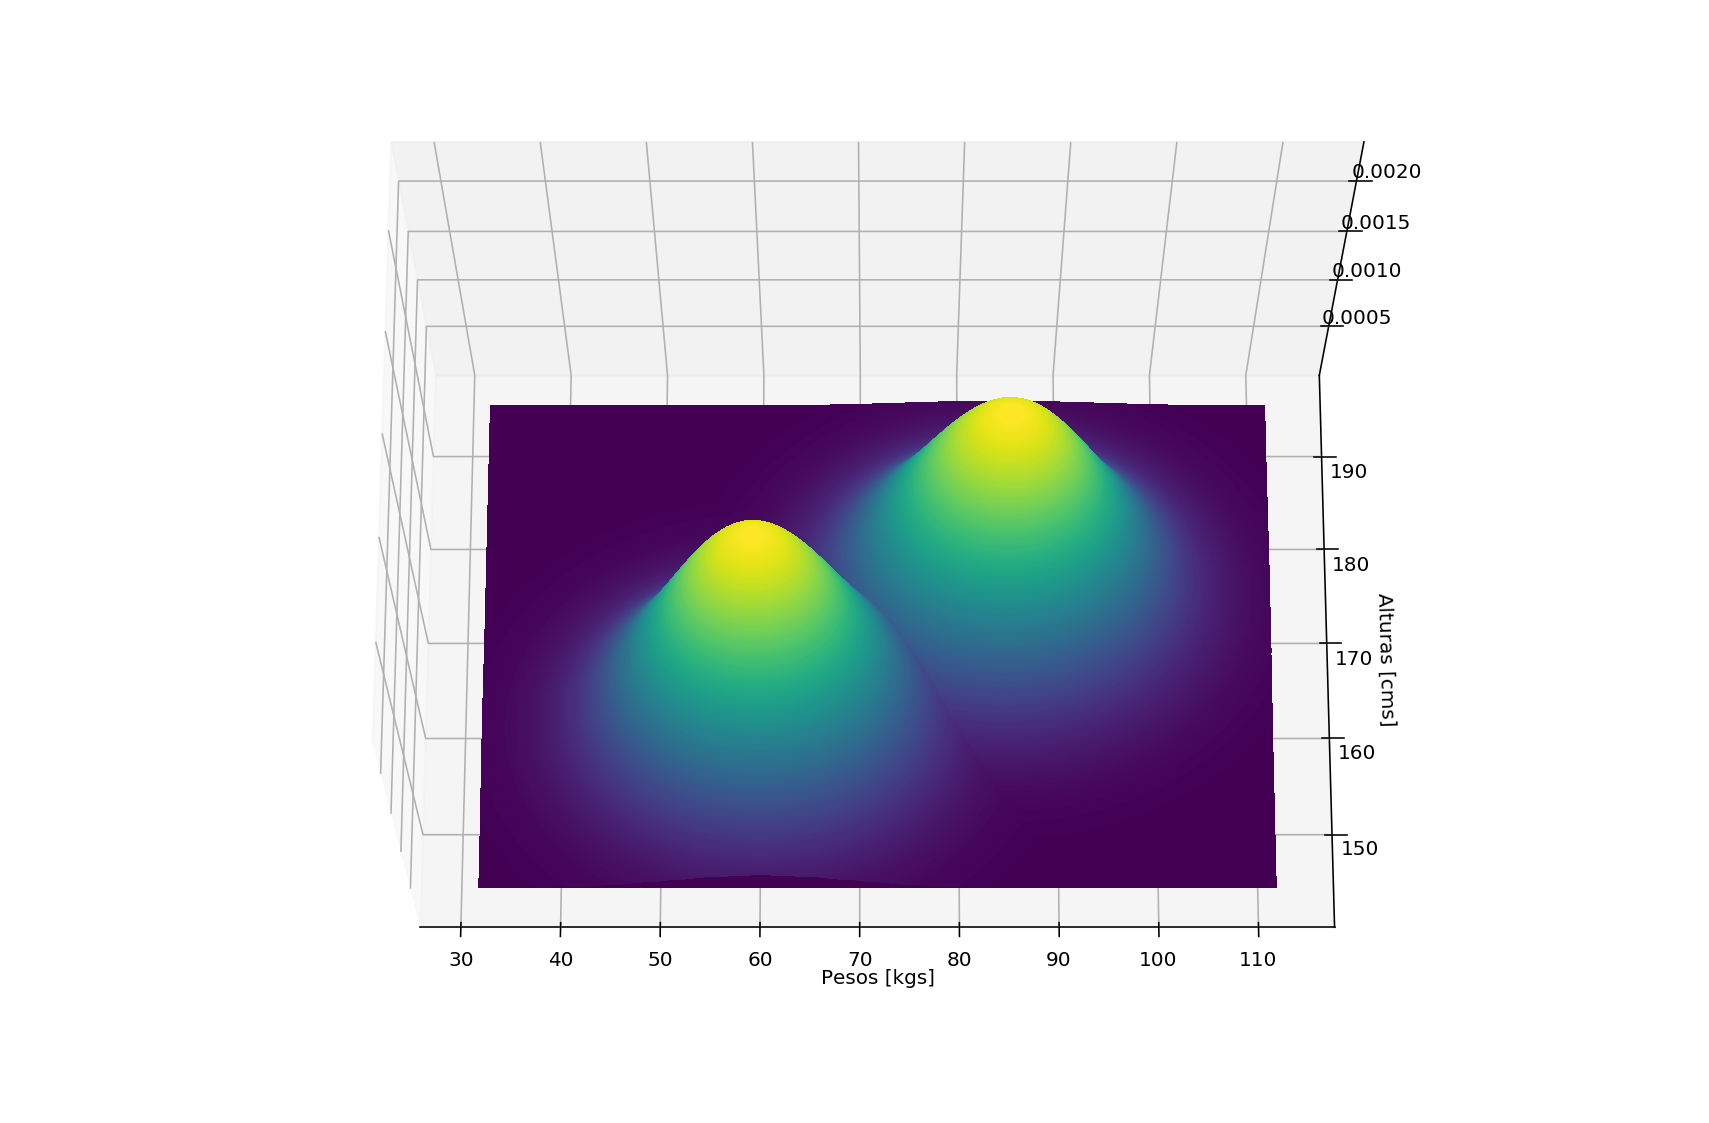

In [14]:
N = 300
X = np.linspace(data.min()['Peso'], data.max()['Peso'], N)
Y = np.linspace(data.min()['Altura'], data.max()['Altura'], N)
X, Y = np.meshgrid(X, Y)


# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# The distribution on the variables X, Y packed into pos.
Z_H_nb = multivariate_normal.pdf(pos, mean_hombres, cov_hombres_nb*np.identity(2))
Z_M_nb = multivariate_normal.pdf(pos, mean_mujeres, cov_mujeres_nb*np.identity(2))
Z_nb, _ = get_prob_naive(pos)

%matplotlib inline
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
#plt.colorbar(cf, ax=ax)
ax.contourf(X, Y, Z_H_nb, 256)
ax.contourf(X, Y, Z_M_nb, 256)
ax.view_init(70, -90)
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.show()

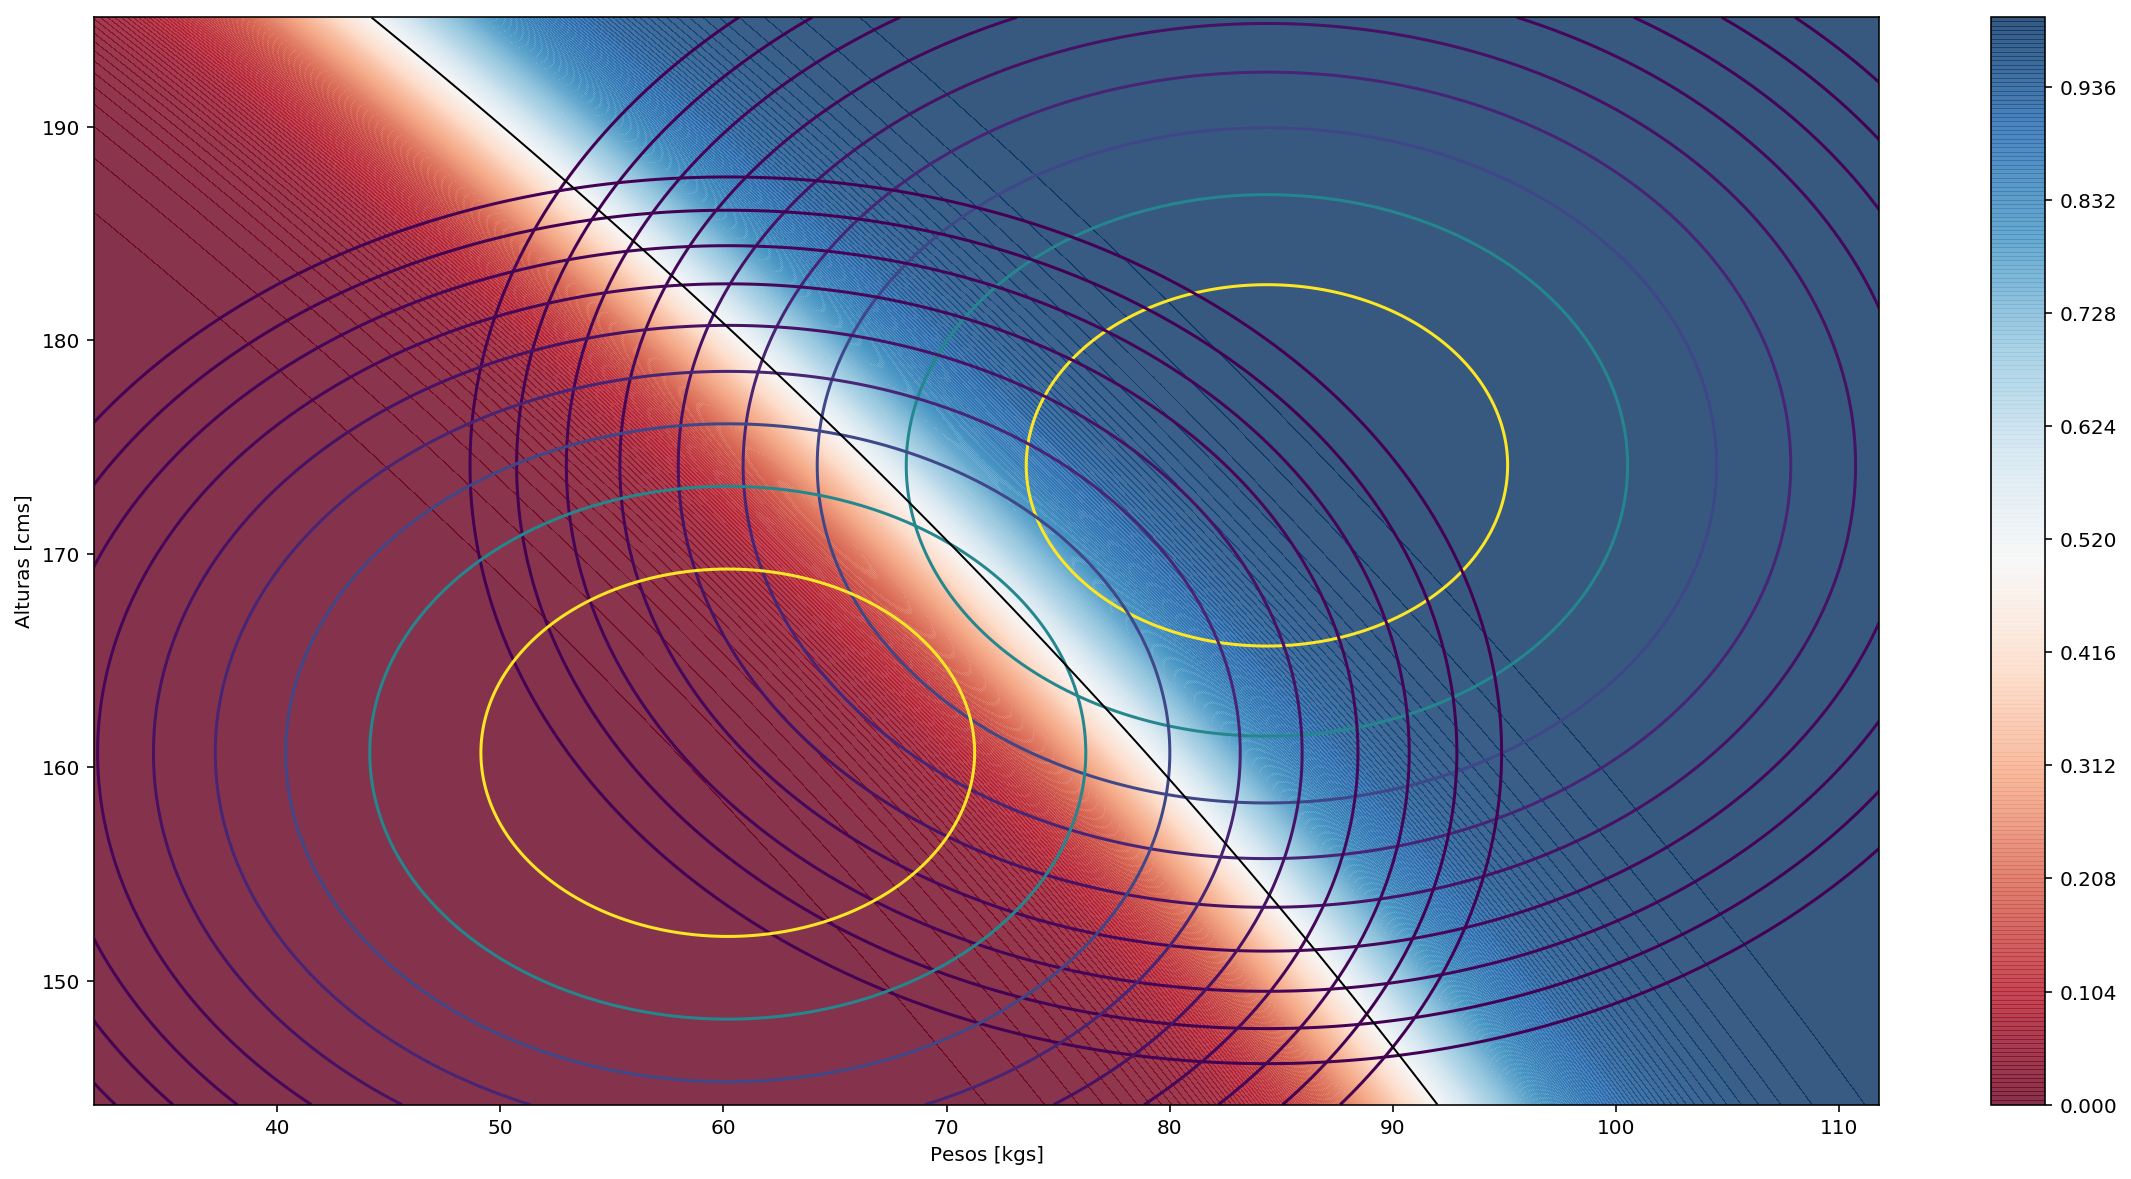

In [15]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_nb, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
z_levels = np.logspace(-5,-2,10)/4
ax.contour(X, Y, Z_H_nb, z_levels)
ax.contour(X, Y, Z_M_nb, z_levels)
ax.contour(X, Y, Z_nb, (0.5,), colors='k', linewidths=1)
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.show()

In [16]:
def get_acc_gauss_naive(data):
    p_class_1, p_class_2 = get_prob_naive(data[['Peso', 'Altura']].values)
    return ((p_class_1>p_class_2)==(data['Genero']=='Hombre')).sum()/len(p_class_1)

In [17]:
get_acc_gauss_naive(data)

0.88

In [18]:
get_acc_gauss_naive(test)

0.887

|Modelo| tipo| Train Acc| CV Acc|Comentarios
|-| -| -| -|-|
|Histogram - step 0.25|Bayes|0.97|0.68
|Histogram - step 0.25|Naive Bayes|0.89|0.88
|Histogram - step 0.5|Bayes|0.94|0.82
|Histogram - step 0.5|Naive Bayes|0.89|0.88
|Histogram - step 1|Bayes|0.92|0.90
|Histogram - step 1|Naive Bayes|0.89|0.88
|Histogram - step 4|Bayes|0.91|0.92| No generaliza por afuera de la zona de los puntos
|Histogram - step 4|Naive Bayes|0.89|0.88
|Histogram - step 8|Bayes|0.90|0.90
|Histogram - step 8|Naive Bayes|0.87|0.86
|Gaussian|Bayes|0.92|0.92|
|Gaussian|Naive Bayes|0.89|0.89|
|Regresion Logística|-|0.92|0.92|

# Regresion Logistica

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_Reg = LogisticRegression()

In [21]:
log_Reg.fit(data[['Peso', 'Altura']].values, data['Genero'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
data[['Peso', 'Altura']][:10]

,Peso,Altura
0,61.235,162.402
1,97.432,181.908
2,73.324,172.459
3,55.193,157.748
4,56.886,151.798
5,59.834,158.623
6,77.618,172.705
7,68.889,169.225
8,53.874,155.487
9,83.248,177.908


In [23]:
log_Reg.score(data[['Peso', 'Altura']].values, data['Genero'])

0.905

In [24]:
log_Reg.score(test[['Peso', 'Altura']].values, test['Genero'])

0.9225

In [25]:
log_Reg.predict_proba(test[['Peso', 'Altura']].values)

array([[0.99173494, 0.00826506],
       [0.02533864, 0.97466136],
       [0.08543259, 0.91456741],
       ...,
       [0.00490791, 0.99509209],
       [0.9466478 , 0.0533522 ],
       [0.03147486, 0.96852514]])

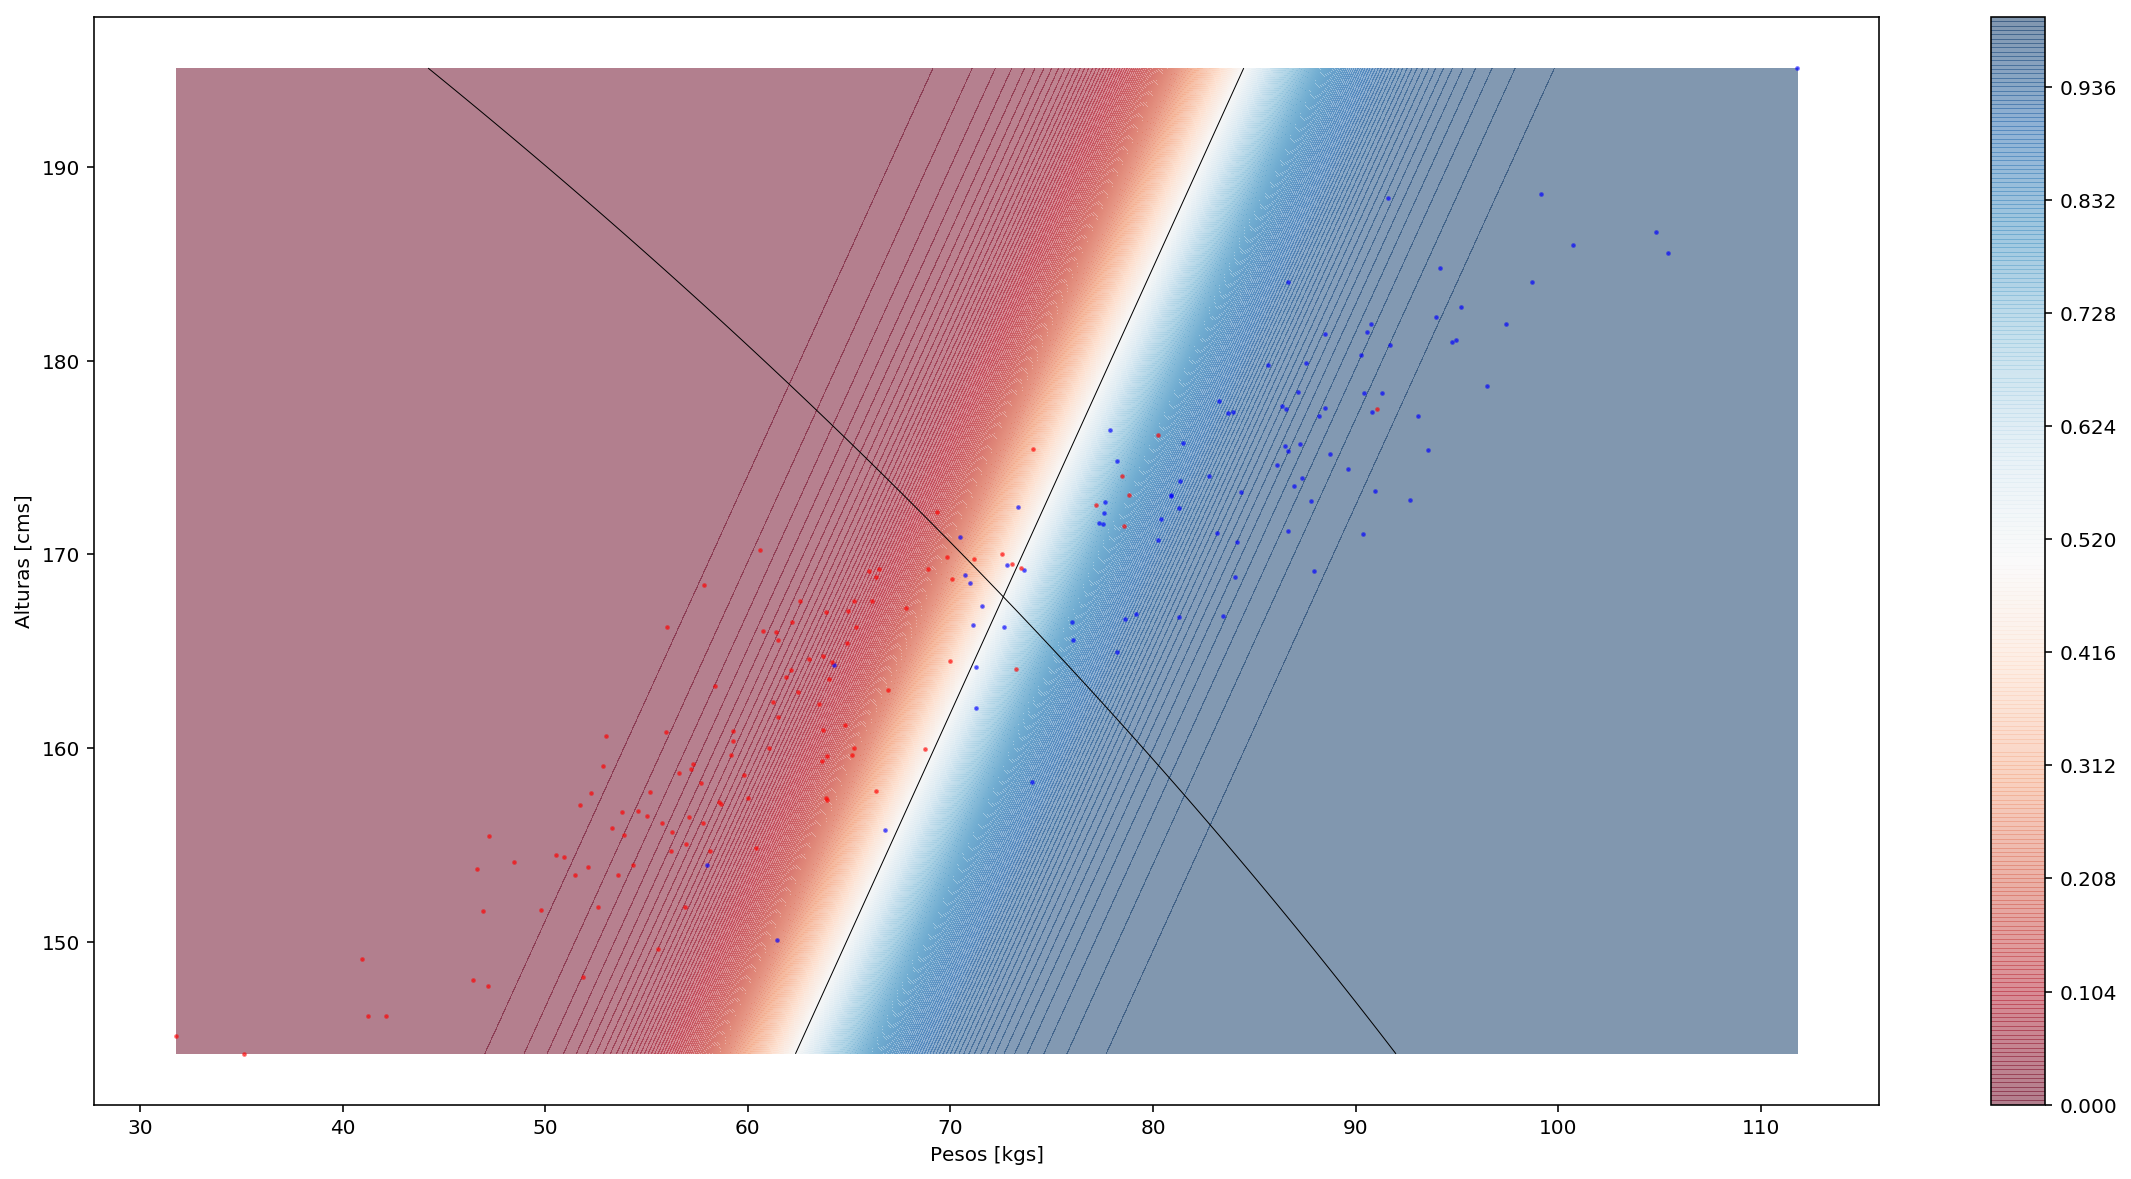

In [30]:
%matplotlib inline
N = 300
X = np.linspace(data.min()['Peso'], data.max()['Peso'], N)
Y = np.linspace(data.min()['Altura'], data.max()['Altura'], N)
X, Y = np.meshgrid(X, Y)

Z_lr = log_Reg.predict_proba(np.c_[X.ravel(), Y.ravel()])[:, 0]

# Put the result into a color plot
Z_lr = Z_lr.reshape(X.shape)

fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_lr, 256, alpha=.5, vmin=0., vmax=1., cmap=cm)
ax.contour(X, Y, Z_lr, (0.5,), colors='k', linewidths=0.5)
#ax.contour(X, Y, Z_gaus, (0.5,), colors='k', linewidths=0.5)
ax.contour(X, Y, Z_nb, (0.5,), colors='k', linewidths=0.5)
#ax.contour(X, Y, Z_LDA, (0.5,), colors='k', linewidths=0.5)
#ax.contour(X, Y, Z_H, z_levels, linewidths=0.5)
#ax.contour(X, Y, Z_M, z_levels, linewidths=0.5)
plt.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=2, alpha=0.5)
plt.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, alpha=0.5)
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.colorbar(cf, ax=ax)
plt.show()